<a href="https://colab.research.google.com/github/jakubgolab/Machine-Learning/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wine Quality
This project aims to develop a model that will be able to predict quality of wine (range between 3 and 8).
Dataset comes from kaggle website: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [472]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [473]:
df = pd.read_csv("/content/drive/MyDrive/ML_bootcamp/WineQT.csv", index_col=12)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Exploratory Data Analysis

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [475]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [476]:
df["quality"] = df["quality"].astype("category")

The dataset consists of 12 explanatory variable and 1 explained variable (range 3-8). Total number of rows is 1143 and there is no missing values.

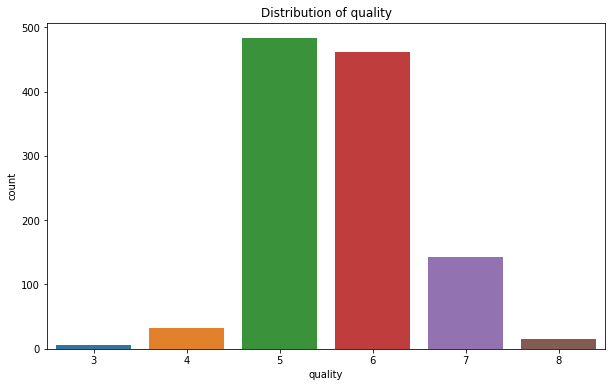

In [477]:
sns.set_style()
plt.figure(figsize=(10, 6))
sns.countplot(x=df["quality"])
plt.title("Distribution of quality")
plt.show()

In [478]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


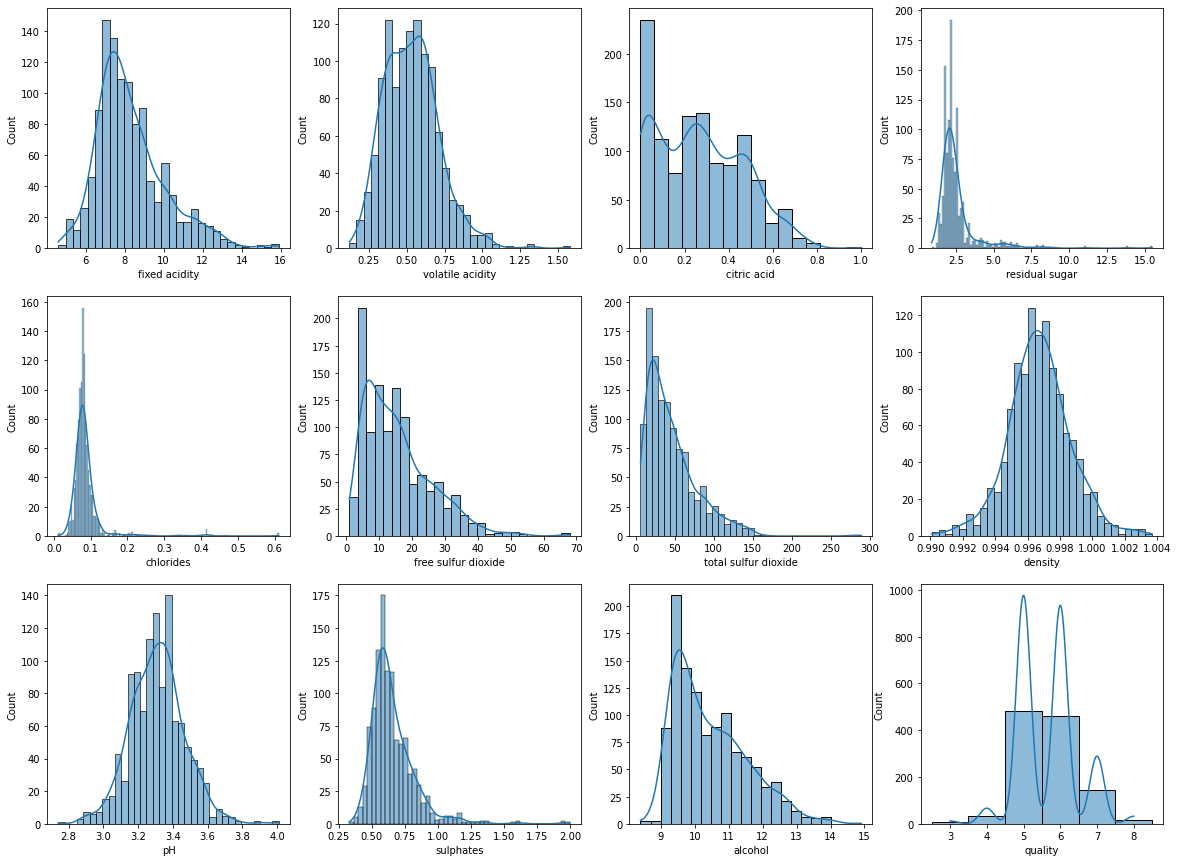

In [479]:
col = list(df.columns)
col = np.array(col).reshape(3, 4)

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for i in range(3):
  for j in range(4):
    sns.histplot(df, x=col[i][j], ax=axes[i][j], kde=True)
plt.show()

In [480]:
df["quality"] = df["quality"].astype("float32")

corr = df.corr()
fig = px.imshow(corr,
                x=df.columns,
                y=df.columns)

df["quality"] = df["quality"].astype("int8")
fig.show()

We can see that the highest correlation between our target variable and alcohol. Another high correlation is between density and fixed acidity. Let's explore scatter plot.

In [481]:
fig = px.scatter(df, x="density", y="fixed acidity", title="Density vs Fixed Acidity", color="quality")
fig.show()

##Data Preparation

In [482]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop("quality")
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [483]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [485]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_train = y_train[:, 3:9]

##Model Building

In [717]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(layers.Dense(units=512, activation="tanh", kernel_regularizer=l2(0.01), input_shape=(11,)))
# model.add(layers.Dense(units=8, activation="tanh", kernel_regularizer=l2(0.01)))
model.add(layers.Dense(units=6, activation="softmax"))
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 512)               6144      
                                                                 
 dense_149 (Dense)           (None, 6)                 3078      
                                                                 
Total params: 9,222
Trainable params: 9,222
Non-trainable params: 0
_________________________________________________________________


In [718]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [719]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
43/43 [==============================] - 1s 8ms/step - loss: 1.5375 - accuracy: 0.5182 - val_loss: 1.3283 - val_accuracy: 0.5872
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 1.2136 - accuracy: 0.6015 - val_loss: 1.1705 - val_accuracy: 0.5581
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 1.1135 - accuracy: 0.5956 - val_loss: 1.0979 - val_accuracy: 0.5465
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 1.0751 - accuracy: 0.6175 - val_loss: 1.0956 - val_accuracy: 0.5872
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 1.0543 - accuracy: 0.6000 - val_loss: 1.0783 - val_accuracy: 0.5814
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 1.0386 - accuracy: 0.5898 - val_loss: 1.0558 - val_accuracy: 0.5756
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 1.0239 - accuracy: 0.5854 - val_loss: 1.0429 - val_accuracy: 0.5640
Epoch 8/100
4

##Model Evaluation

In [720]:
pred = np.argmax(model.predict(X_test), 1) + 3

data = {
    "y_pred" : pred.ravel(),
    "y_true" : y_test.ravel()
}

data = pd.DataFrame(data)
data.head()

9/9 [==============================] - 0s 2ms/step


,y_pred,y_true
0,6,6
1,5,4
2,5,5
3,6,6
4,5,6


In [721]:
data["error"] = data["y_true"] - data["y_pred"]

In [722]:
len(data[data["error"] == 0]) / len(data)

0.6013986013986014

In [723]:
fig = px.histogram(data, x="error", title="Model prediction - error distribution")
fig.show()

In [724]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(data["y_true"], data["y_pred"])
fig = px.imshow(matrix,
                x=[3, 4, 5, 6, 7, 8],
                y=[3, 4, 5, 6, 7, 8],
                text_auto=True)

fig.show()

In [725]:
X = df.copy()
y = X.pop('quality')
X = X.values
y = y.values

In [726]:
pred = model.predict(X)
pred = np.argmax(pred, 1) + 3

36/36 [==============================] - 0s 1ms/step


In [727]:
matrix = confusion_matrix(y, pred)
fig = px.imshow(matrix,
                x=[3, 4, 5, 6, 7, 8],
                y=[3, 4, 5, 6, 7, 8],
                text_auto=True)

fig.show()

In [728]:
data = {
    "y_pred" : pred.ravel(),
    "y_true" : y.ravel()
}

data = pd.DataFrame(data)

data["error"] = data["y_true"] - data["y_pred"]

In [729]:
fig = px.histogram(data, x="error", title="Model prediction - error distribution")
fig.show()